# MNIST digits classification with TensorFlow

<img src="images/mnist_sample.png" style="width:30%">

In [112]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)

We're using TF 1.2.1


In [113]:
import sys
sys.path.append("../..")
import grading

import matplotlib_utils
from importlib import reload
reload(matplotlib_utils)

import grading_utils
reload(grading_utils)

import keras_utils
from keras_utils import reset_tf_session

# Fill in your Coursera token and email
To successfully submit your answers to our grader, please fill in your Coursera submission token and email

In [114]:
grader = grading.Grader(assignment_key="XtD7ho3TEeiHQBLWejjYAA", 
                        all_parts=["9XaAS", "vmogZ", "RMv95", "i8bgs", "rE763"])

In [128]:
# token expires every 30 min
COURSERA_TOKEN = "Lr93QIHfo7cChrVf"
COURSERA_EMAIL = "wilsonjusuf1998@gmail.com"

# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [116]:
import preprocessed_mnist
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset_from_file()

X_train [shape (50000, 28, 28)] sample patch:
 [[ 0.          0.29803922  0.96470588  0.98823529  0.43921569]
 [ 0.          0.33333333  0.98823529  0.90196078  0.09803922]
 [ 0.          0.33333333  0.98823529  0.8745098   0.        ]
 [ 0.          0.33333333  0.98823529  0.56862745  0.        ]
 [ 0.          0.3372549   0.99215686  0.88235294  0.        ]]
A closeup of a sample patch:


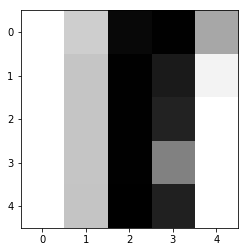

And the whole sample:


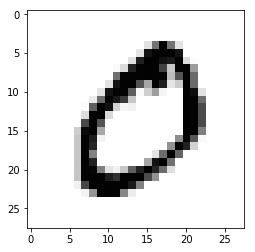

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [117]:
# X contains rgb values divided by 255
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

# Linear model

Your task is to train a linear classifier $\vec{x} \rightarrow y$ with SGD using TensorFlow.

You will need to calculate a logit (a linear transformation) $z_k$ for each class: 
$$z_k = \vec{x} \cdot \vec{w_k} + b_k \quad k = 0..9$$

And transform logits $z_k$ to valid probabilities $p_k$ with softmax: 
$$p_k = \frac{e^{z_k}}{\sum_{i=0}^{9}{e^{z_i}}} \quad k = 0..9$$

We will use a cross-entropy loss to train our multi-class classifier:
$$\text{cross-entropy}(y, p) = -\sum_{k=0}^{9}{\log(p_k)[y = k]}$$ 

where 
$$
[x]=\begin{cases}
       1, \quad \text{if $x$ is true} \\
       0, \quad \text{otherwise}
    \end{cases}
$$

Cross-entropy minimization pushes $p_k$ close to 1 when $y = k$, which is what we want.

Here's the plan:
* Flatten the images (28x28 -> 784) with `X_train.reshape((X_train.shape[0], -1))` to simplify our linear model implementation
* Use a matrix placeholder for flattened `X_train`
* Convert `y_train` to one-hot encoded vectors that are needed for cross-entropy
* Use a shared variable `W` for all weights (a column $\vec{w_k}$ per class) and `b` for all biases.
* Aim for ~0.93 validation accuracy

In [131]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [132]:
import keras

y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)
print(y_train)
print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

[5 0 4 ..., 8 4 8]
(50000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]] [5 0 4]


In [140]:
# run this again if you remake your graph
s = reset_tf_session()

In [141]:
# Model parameters: W and b
W = tf.get_variable("W", shape=(784, 10), dtype=tf.float32)### YOUR CODE HERE ### tf.get_variable(...) with shape[0] = 784
b = tf.get_variable('b', shape=(10,))### YOUR CODE HERE ### tf.get_variable(...)

In [142]:
# Placeholders for the input data
input_X = tf.placeholder(np.float32, (None, 784))### YOUR CODE HERE ### tf.placeholder(...) for flat X with shape[0] = None for any batch size
input_y = tf.placeholder(np.float32, (None, 10))### YOUR CODE HERE ### tf.placeholder(...) for one-hot encoded true labels

In [143]:
# Compute predictions
logits = tf.matmul(input_X, W) + b ### YOUR CODE HERE ### logits for input_X, resulting shape should be [input_X.shape[0], 10]
probas = tf.nn.softmax(logits)### YOUR CODE HERE ### apply tf.nn.softmax to logits
classes = tf.argmax(probas, axis=1)### YOUR CODE HERE ### apply tf.argmax to find a class index with highest probability
# NOTE: ^ we use axis=1 to argmax over the classes.
# Loss should be a scalar number: average loss over all the objects with tf.reduce_mean().
# Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot encoded input_y and logits.
# It is identical to calculating cross-entropy on top of probas, but is more numerically friendly (read the docs).
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=input_y))### YOUR CODE HERE ### cross-entropy loss

# Use a default tf.train.AdamOptimizer to get an SGD step
step = tf.train.AdamOptimizer().minimize(loss) ### YOUR CODE HERE ### optimizer step that minimizes the loss

In [144]:
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512 # changed this from 512 since 500 divides 50,000.
EPOCHS = 40

# for logging the progress right here in Jupyter (for those who don't have TensorBoard)
simpleTrainingCurves = matplotlib_utils.SimpleTrainingCurves("cross-entropy loss", "accuracy")

for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples. OK OK
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  # data is already shuffled
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        # collect batch losses, this is almost free as we need a forward pass for backprop anyway
        batch_losses.append(batch_loss)
    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})  # this part is usually small    
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))  # this is slow and usually skipped
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat}))  
    
    simpleTrainingCurves.add(train_loss, val_loss, train_accuracy, valid_accuracy)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5z4tfFv4b/AAJ%2BHep/Ff4ueLbXQ/D2jxI9/qV3uKpvdY40VVBaSR5HSNI0DO7uqKrMwB6OvJf20v2f/Ff7RfwatfDHw98QadpviXw94x0HxX4al1qJ3sJr/SdTt9Qht7pY/n8mU2/ls6ZaPeJFDMgUgGNr/wDwUc/ZP8KeGtA8TeLPEfi/Sf8AhKdeudF8OaPqvwp8R22r6jqEFt9qe3i02SwW8dzD86AQ/vBwm48VfsP2/wD9k/UfitafBaL4k3keu3mp2%2BlobrwpqcNjFqk1utzFpc1/JbC0g1BonVvsMkq3PzAGPJxXNaj8Ev2nfjN8aPgn8cfjR4X%2BH/hu7%2BGni7Xb/VNH8NeLL3V0a0u9CuNPgMFxPp1oZJvOuGZ1aONVj6M54Pn2q/sGftI3fibUfgzba54H/wCFT6t%2B0NZ/Fe48SvqF4PEcMkGs22unSVsxbeQwbULZUF59qVltnMYgLKHoA9n0H9vn9lnxG/ii5sPHOrRaT4O0zU9R17xXqHgnV7TQUtdPcpeyw6tPaJY3YhZWDeRNIRsbg7Wx1nwR/aF%2BHP7Qml3usfDu08VQRafMkdxF4s8A6x4fmO9dyukOq2tvJLGR0kRWQ4%2B9XzB4T/YX/aV0v4h%2BMriDwH8N/D/gHX/CfiOw1f4YQfE7Xda8O%2BNL3UHRopLnTLyxS30CPm4M32HzzL9qYMGCjPS/s3/sKfFmPwt4s8HftM%2BOPEei%2BFtR1fTrzwZ4H8AftDeLr2Tw80FvNFcFdfZtP1GWGdpVb7C3%2Bjw%2BQhQEn5QD1fxp%2B3J%2By98Pvi7/AMKQ8V/EeaDXo9TsdNv5IfDuoT6dpl9e%2BX9js73UYrdrOxuJ/Nh8qG4mjkk86Lap8xN2Xpn/AAUX/Y91j4vP8DdP%2BKV2%2Bvw%2BMpfCVw7eEtVXT7fXYwSdMl1FrUWcV0wGY4XmDyggxhwwz4H48/4JY%2BLb349eNtVttBg8aeA/iJ44s/EmpW%2BuftFeNPD50qRIbKOWJ9H04yWGsEPZLMkkzW75ZY5C4iVz2V9%2BwP8AFyfwDrPhi38QeGUu9S/a4074pxy/a7gL/ZFvr1jqDwsRBn7WYLV0CYMZYqDIFJYAFv4P/wDBXv8AZo8b/CfxT8X/AIsaZ4r%2BH2leF/iXqPhCa88Q%2BAdfjtbiWLxBcaNZPHcTabEjzTyQxtJbJvks3lMU5Vo2au48Rf8ABSf9jzwdd6fYeMviDrmjTX2n29/dxax8PtctTodpPcSW0Fxq3m2S/wBixSyxSLG9/wDZ1fYSpIGa8kj/AGEv2mX8F3/wQu4/ALeGbP8AamtvitoXiE%2BJb1r27s5fGx8S3dncWR0/y4JokkeGJ0uJVmZVLeQCSL37VX7Dv7S/xI8S/HLwv8GNa8CHwj%2B0h4OtNA8aan4qvruPUfC22wl0y4ubK3htpYtRD2citHDLLaiOdGcvIrlQAep%2BLP8Ago3%2Bxz4H%2BMmtfAXxR8Vrq28SeGtf07RfEyjwnqsljot7qFvbXFjHe36WptLRbhLy3EUk0qRyOzRqxkjkRenf9rn9nqPwzL4uf4g4s4fiKvgSQf2Td%2BePEDaguniy8jyvNJNwy/vAvleUfP3%2BR%2B9r4nuP2bv2iP2hvjn%2B2V%2BzL8NJvBdt4B8YfFHwro3ivxDr2p3aazpFtF4J8LtcSWkMdvJHfSywEJH5k1t5EqmXM27Yva%2BEPhXpvxY/4LKeJrj4dePNM1n4b%2BBbaz8c%2BNNI02QTJp/xJlsbjQIYpWUmMSDSIvOeA/vIpUglcAyxkgH0f8dPj74t%2BF/7R3wU%2BEWjWGmSaV8R9e1uy165vYpDPbxWei3V/G0DLIqoTLAgYurgoWAAOGGX4G/4KQ/sWfES11vU/DnxsijsNA8LXnia51XWNCv9OsrzRLUgXOqWNzdwRxalZRErvubRpol8xMt865X9qn9lnxF%2B0R8XPhV4otdas7TQ/CF34iHiVXuZI7uS31HQbzTU%2By7Y2UyLJcqx3sgCgkFiAp8Q8DfsC/tS6p4d8FeDvj7ovwi1vSPhB8FtZ8B%2BEtKtdQv5LXxub60s7IzatFJZqNMtmtrIK9rCbzLXBYSYiVGAPdx%2B37%2BzSnw7uPifqWoeNdN0%2BHV7bS4LLWfhN4jsdT1C8uAWghstOuNPS8v2dVdl%2BzwyAhHOcKxHpPwz%2BI/hj4ueCLH4heDo9VTTtQEnkR654fvNKu0KSNG6y2l7FFcQMHRhtkjU8Zxggn478PfsKftVRfCTxT4Q8deCfBniPTr7xPpF/wCCvhlrf7QPim7h8KC1gnWe7sPFMmn/ANqWlxJI8JjijgEcCROkbAStj6R/Y1%2BF/wAbPg7%2Bz7pXgH9oP4jnxR4ltr7UJpL46rcah9ltJr2ea0sfttyiT332a2eG3%2B1TIss3k%2BY6hmIoA9RooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvEdI/4KMfse6ld69Z6n8Urzw83hzw5c%2BINQk8a%2BEdV0GObSbd0jnv7WTUrWBb63R5IlaW2MqAyxjOXXPtN7FczWcsNndCCZ4mWKYx7/LYjhtp64POO9fmJq/8AwRy/bl%2BL%2BreF9c%2BN3xx0N9b8NeD9Qs9Q8Uah8VvE3iceIdb%2B2aVfWuonS76KGy0m2kudMXz7CyAURybVlkCoFAPtl/2//wBmG1%2BGjfFjWPEHirStLbXINGsbPXPhlr9hqmp38yGSGCy024sUvb9pEDOv2eGQMqOwJCMR0XgP9qz4H/EfX7Lwn4c8Q6pDq9/4Un8SQ6RrXhXUtMu002G7%2BySyyw3lvFJA6z/IYZFWXvs2815N8Tvg5%2B278Ym%2BHvxt1zwb8KtD%2BIfwo8dTax4f8M2vjjUr/Rdcs7jSbvTLmO4vn0qGaxmKXskkbpa3AjMQU%2BYJGxV%2BJPwG/bg1/wCMvh39prwPo3wrtPFl98MNV8F%2BMdC1LxXqUlhpC3F/DdWt/ZXCacJNQMQjdZLeWK0EpcYlixyAdxpP/BRv9kDxHr3gXwt4V%2BI2q6zqfxJ8G6V4t8G6dongfWb2e80PUX2WuoyJBaM1rb7seZJOI1twymbygwJ2Phr%2B25%2Bzd8V/iNc/Cfwz4v1az1%2B30u51OGy8T%2BDNW0Rb%2Bxt5Ejn

# Submit a linear model

In [145]:
## GRADED PART, DO NOT CHANGE!
# Testing shapes 
grader.set_answer("9XaAS", grading_utils.get_tensors_shapes_string([W, b, input_X, input_y, logits, probas, classes]))
# Validation loss
grader.set_answer("vmogZ", s.run(loss, {input_X: X_val_flat, input_y: y_val_oh}))
# Validation accuracy
grader.set_answer("RMv95", accuracy_score(y_val, s.run(classes, {input_X: X_val_flat})))

In [146]:
# you can make submission with answers so far to check yourself at this stage
print(COURSERA_EMAIL, COURSERA_TOKEN)
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

wilsonjusuf1998@gmail.com Lr93QIHfo7cChrVf
Submitted to Coursera platform. See results on assignment page!


# MLP with hidden layers

Previously we've coded a dense layer with matrix multiplication by hand. 
But this is not convenient, you have to create a lot of variables and your code becomes a mess. 
In TensorFlow there's an easier way to make a dense layer:
```python
hidden1 = tf.layers.dense(inputs, 256, activation=tf.nn.sigmoid)
```

That will create all the necessary variables automatically.
Here you can also choose an activation function (remember that we need it for a hidden layer!).

Now define the MLP with 2 hidden layers and restart training with the cell above.

You're aiming for ~0.97 validation accuracy here.

In [154]:
# write the code here to get a new `step` operation and then run the cell with training loop above.
# name your variables in the same way (e.g. logits, probas, classes, etc) for safety.
### YOUR CODE HERE ###
# run this again if you remake your graph
s = reset_tf_session()

# Placeholders for the input data
input_X = tf.placeholder(np.float32, (None, 784))### YOUR CODE HERE ### tf.placeholder(...) for flat X with shape[0] = None for any batch size
input_y = tf.placeholder(np.float32, (None, 10))### YOUR CODE HERE ### tf.placeholder(...) for one-hot encoded true labels

# no need to use bias and weights. the layers below do that for us automatically.
h1 = tf.layers.dense(input_X, 256, activation=tf.nn.sigmoid, use_bias=True)
h2 = tf.layers.dense(h1, 256, activation=tf.nn.sigmoid, use_bias=True)

logits = tf.layers.dense(h1, 10, activation=tf.nn.sigmoid, use_bias=True)
probas = tf.nn.softmax(logits)
classes = tf.argmax(probas, axis=1)

# calculate optimizers and losses:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=input_y))

# Use a default tf.train.AdamOptimizer to get an SGD step
step = tf.train.AdamOptimizer().minimize(loss)

# all set.

In [155]:
## Training here
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512 # changed this from 512 since 500 divides 50,000.
EPOCHS = 40

# for logging the progress right here in Jupyter (for those who don't have TensorBoard)
simpleTrainingCurves = matplotlib_utils.SimpleTrainingCurves("cross-entropy loss", "accuracy")

for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples. OK OK
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  # data is already shuffled
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        # collect batch losses, this is almost free as we need a forward pass for backprop anyway
        batch_losses.append(batch_loss)
    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})  # this part is usually small    
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))  # this is slow and usually skipped
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat}))  
    
    simpleTrainingCurves.add(train_loss, val_loss, train_accuracy, valid_accuracy)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5z4tfFv4b/AAJ%2BHep/Ff4ueLbXQ/D2jxI9/qV3uKpvdY40VVBaSR5HSNI0DO7uqKrMwB6OvJf20v2f/Ff7RfwatfDHw98QadpviXw94x0HxX4al1qJ3sJr/SdTt9Qht7pY/n8mU2/ls6ZaPeJFDMgUgGNr/wDwUc/ZP8KeGtA8TeLPEfi/Sf8AhKdeudF8OaPqvwp8R22r6jqEFt9qe3i02SwW8dzD86AQ/vBwm48VfsP2/wD9k/UfitafBaL4k3keu3mp2%2BlobrwpqcNjFqk1utzFpc1/JbC0g1BonVvsMkq3PzAGPJxXNaj8Ev2nfjN8aPgn8cfjR4X%2BH/hu7%2BGni7Xb/VNH8NeLL3V0a0u9CuNPgMFxPp1oZJvOuGZ1aONVj6M54Pn2q/sGftI3fibUfgzba54H/wCFT6t%2B0NZ/Fe48SvqF4PEcMkGs22unSVsxbeQwbULZUF59qVltnMYgLKHoA9n0H9vn9lnxG/ii5sPHOrRaT4O0zU9R17xXqHgnV7TQUtdPcpeyw6tPaJY3YhZWDeRNIRsbg7Wx1nwR/aF%2BHP7Qml3usfDu08VQRafMkdxF4s8A6x4fmO9dyukOq2tvJLGR0kRWQ4%2B9XzB4T/YX/aV0v4h%2BMriDwH8N/D/gHX/CfiOw1f4YQfE7Xda8O%2BNL3UHRopLnTLyxS30CPm4M32HzzL9qYMGCjPS/s3/sKfFmPwt4s8HftM%2BOPEei%2BFtR1fTrzwZ4H8AftDeLr2Tw80FvNFcFdfZtP1GWGdpVb7C3%2Bjw%2BQhQEn5QD1fxp%2B3J%2By98Pvi7/AMKQ8V/EeaDXo9TsdNv5IfDuoT6dpl9e%2BX9js73UYrdrOxuJ/Nh8qG4mjkk86Lap8xN2Xpn/AAUX/Y91j4vP8DdP%2BKV2%2Bvw%2BMpfCVw7eEtVXT7fXYwSdMl1FrUWcV0wGY4XmDyggxhwwz4H48/4JY%2BLb349eNtVttBg8aeA/iJ44s/EmpW%2BuftFeNPD50qRIbKOWJ9H04yWGsEPZLMkkzW75ZY5C4iVz2V9%2BwP8AFyfwDrPhi38QeGUu9S/a4074pxy/a7gL/ZFvr1jqDwsRBn7WYLV0CYMZYqDIFJYAFv4P/wDBXv8AZo8b/CfxT8X/AIsaZ4r%2BH2leF/iXqPhCa88Q%2BAdfjtbiWLxBcaNZPHcTabEjzTyQxtJbJvks3lMU5Vo2au48Rf8ABSf9jzwdd6fYeMviDrmjTX2n29/dxax8PtctTodpPcSW0Fxq3m2S/wBixSyxSLG9/wDZ1fYSpIGa8kj/AGEv2mX8F3/wQu4/ALeGbP8AamtvitoXiE%2BJb1r27s5fGx8S3dncWR0/y4JokkeGJ0uJVmZVLeQCSL37VX7Dv7S/xI8S/HLwv8GNa8CHwj%2B0h4OtNA8aan4qvruPUfC22wl0y4ubK3htpYtRD2citHDLLaiOdGcvIrlQAep%2BLP8Ago3%2Bxz4H%2BMmtfAXxR8Vrq28SeGtf07RfEyjwnqsljot7qFvbXFjHe36WptLRbhLy3EUk0qRyOzRqxkjkRenf9rn9nqPwzL4uf4g4s4fiKvgSQf2Td%2BePEDaguniy8jyvNJNwy/vAvleUfP3%2BR%2B9r4nuP2bv2iP2hvjn%2B2V%2BzL8NJvBdt4B8YfFHwro3ivxDr2p3aazpFtF4J8LtcSWkMdvJHfSywEJH5k1t5EqmXM27Yva%2BEPhXpvxY/4LKeJrj4dePNM1n4b%2BBbaz8c%2BNNI02QTJp/xJlsbjQIYpWUmMSDSIvOeA/vIpUglcAyxkgH0f8dPj74t%2BF/7R3wU%2BEWjWGmSaV8R9e1uy165vYpDPbxWei3V/G0DLIqoTLAgYurgoWAAOGGX4G/4KQ/sWfES11vU/DnxsijsNA8LXnia51XWNCv9OsrzRLUgXOqWNzdwRxalZRErvubRpol8xMt865X9qn9lnxF%2B0R8XPhV4otdas7TQ/CF34iHiVXuZI7uS31HQbzTU%2By7Y2UyLJcqx3sgCgkFiAp8Q8DfsC/tS6p4d8FeDvj7ovwi1vSPhB8FtZ8B%2BEtKtdQv5LXxub60s7IzatFJZqNMtmtrIK9rCbzLXBYSYiVGAPdx%2B37%2BzSnw7uPifqWoeNdN0%2BHV7bS4LLWfhN4jsdT1C8uAWghstOuNPS8v2dVdl%2BzwyAhHOcKxHpPwz%2BI/hj4ueCLH4heDo9VTTtQEnkR654fvNKu0KSNG6y2l7FFcQMHRhtkjU8Zxggn478PfsKftVRfCTxT4Q8deCfBniPTr7xPpF/wCCvhlrf7QPim7h8KC1gnWe7sPFMmn/ANqWlxJI8JjijgEcCROkbAStj6R/Y1%2BF/wAbPg7%2Bz7pXgH9oP4jnxR4ltr7UJpL46rcah9ltJr2ea0sfttyiT332a2eG3%2B1TIss3k%2BY6hmIoA9RooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKzfGHjLwh8PPC9/wCOPH/ivTdD0XS7ZrjU9Y1i%2BjtrWzhUZaSWWQhI0A6sxAFAGlRXOaZ8YfhHrXwyHxr0f4peHLvwadPe/Hi221y3k0w2iAl7j7UrmLylCtl920bTk8ViX/7Vv7LmlfCm1%2BO%2Bp/tJeAbbwPe3P2ez8ZT%2BMbJNKnm3MvlpdmXyXfcjrtDE5Rh2NAHfUVW0XWtH8R6PaeIfD2rW1/p9/bR3FjfWU6yw3ELqGSSN1JV0ZSCGBIIIIqzQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeI6R/wUY/Y91K716z1P4pXnh5vDnhy58QahJ418I6roMc2k27pHPf2smpWsC31ujyRK0tsZUBljGcuufab2K5ms5YbO6EEzxMsUxj3%2BWxHDbT1wecd6/MTV/%2BCOX7cvxf1bwvrnxu%2BOOhvrfhrwfqFnqHijUPit4m8TjxDrf2zSr611E6XfRQ2Wk20lzpi%2BfYWQCiOTassgVAoB9sv%2B3/APsw2vw0b4sax4g8VaVpba5Bo1jZ658MtfsNU1O/mQyQwWWm3Fil7ftIgZ1%2BzwyBlR2BIRiOi8B/tWfA/wCI%2Bv2XhPw54h1SHV7/AMKT%2BJIdI1rwrqWmXaabDd/ZJZZYby3ikgdZ/kMMirL32bea8m%2BJ3wc/bd%2BMTfD342654N%2BFWh/EP4UeOptY8P8Ahm18calf6LrlncaTd6Zcx3F8%2BlQzWMx

# Submit the MLP with 2 hidden layers
Run these cells after training the MLP with 2 hidden layers

In [156]:
## GRADED PART, DO NOT CHANGE!
# Validation loss for MLP
grader.set_answer("i8bgs", s.run(loss, {input_X: X_val_flat, input_y: y_val_oh}))
# Validation accuracy for MLP
grader.set_answer("rE763", accuracy_score(y_val, s.run(classes, {input_X: X_val_flat})))

In [157]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!
